In [14]:
try:
    import geopandas as gpd
except ModuleNotFoundError:
    !pip install geopandas
    import geopandas as gpd

try:
    import cufflinks as cf
except ModuleNotFoundError:
    !pip install cufflinks
    import cufflinks as cf
    
try:
    from wordcloud import WordCloud, ImageColorGenerator
except ModuleNotFoundError:
    !pip install wordcloud
    from wordcloud import WordCloud, ImageColorGenerator
import pandas as pd

In [15]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import os, sys
from collections import defaultdict
from urllib.request import urlopen
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import widgets
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [16]:
vote = pd.read_csv("C:/Users/viina/Downloads/archive (4)/2019_Results_Winning_Candidate.csv")
vote.head()

,State,Constituency,Votes,Percentage,Party,Candidate
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,95308,45.98,Indian National Congress,KULDEEP RAI SHARMA
1,Andhra Pradesh,Amalapuram,485313,39.43,Yuvajana Sramika Rythu Congress Party,CHINTA ANURADHA
2,Andhra Pradesh,Anakapalli,586226,47.33,Yuvajana Sramika Rythu Congress Party,Dr.Beesetti Venkata Satyavathi
3,Andhra Pradesh,Anantapur,695208,51.79,Yuvajana Sramika Rythu Congress Party,TALARI RANGAIAH
4,Andhra Pradesh,Aruku,562190,52.32,Yuvajana Sramika Rythu Congress Party,GODDETI. MADHAVI


In [17]:
vote.isnull().sum()

State           0
Constituency    0
Votes           0
Percentage      0
Party           0
Candidate       0
dtype: int64

In [18]:
vote[vote.Party.isnull()==True]['Candidate'].unique()

array([], dtype=object)

In [19]:
import pandas as pd
import plotly.express as px

# Load the CSV file
file_path = "C:/Users/viina/Downloads/archive (4)/2019_Results_Winning_Candidate.csv"
vote = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
print(vote.head())

# Create a bar plot for Constituency vs Party vs Percentage
fig = px.bar(vote, x='Constituency', y='Percentage', color='Party',
             labels={'Percentage': 'Winning Percentage'},
             title='Constituency vs Party vs Winning Percentage')

# Update the layout for better readability
fig.update_layout(
    xaxis_title='Constituency',
    yaxis_title='Winning Percentage',
    legend_title='Party',
    template='plotly_dark',
    xaxis={'categoryorder':'total descending'}
)

# Show the plot
fig.show()


                       State                Constituency   Votes  Percentage  \
0  Andaman & Nicobar Islands  Andaman & Nicobar Islands    95308       45.98   
1             Andhra Pradesh                  Amalapuram  485313       39.43   
2             Andhra Pradesh                  Anakapalli  586226       47.33   
3             Andhra Pradesh                   Anantapur  695208       51.79   
4             Andhra Pradesh                       Aruku  562190       52.32   

                                   Party                       Candidate  
0               Indian National Congress              KULDEEP RAI SHARMA  
1  Yuvajana Sramika Rythu Congress Party                 CHINTA ANURADHA  
2  Yuvajana Sramika Rythu Congress Party  Dr.Beesetti Venkata Satyavathi  
3  Yuvajana Sramika Rythu Congress Party                 TALARI RANGAIAH  
4  Yuvajana Sramika Rythu Congress Party                GODDETI. MADHAVI  


In [9]:
import pandas as pd
import plotly.express as px

# Load the CSV file
file_path = "C:/Users/viina/Downloads/archive (4)/2019_Results_Winning_Candidate.csv"
vote = pd.read_csv(file_path)

# Filter the data for Andhra Pradesh
ap_vote = vote[vote['State'] == 'Andhra Pradesh']

# Display the first few rows to understand the data structure
print(ap_vote.head())

# Define custom colors
color_map = {'Telugu Desam': 'yellow'}

# Create a bar plot for Constituency vs Party vs Percentage for Andhra Pradesh
fig = px.bar(ap_vote, x='Constituency', y='Percentage', color='Party',
             color_discrete_map=color_map,  # Apply custom colors
             labels={'Percentage': 'Winning Percentage'},
             title='Andhra Pradesh Constituencies: Party vs Winning Percentage')

# Update the layout for better readability
fig.update_layout(
    xaxis_title='Constituency',
    yaxis_title='Winning Percentage',
    legend_title='Party',
    template='plotly_dark',
    xaxis={'categoryorder':'total descending'}
)

# Show the plot
fig.show()


            State Constituency   Votes  Percentage  \
1  Andhra Pradesh   Amalapuram  485313       39.43   
2  Andhra Pradesh   Anakapalli  586226       47.33   
3  Andhra Pradesh    Anantapur  695208       51.79   
4  Andhra Pradesh        Aruku  562190       52.32   
5  Andhra Pradesh      Bapatla  598257       47.24   

                                   Party                       Candidate  
1  Yuvajana Sramika Rythu Congress Party                 CHINTA ANURADHA  
2  Yuvajana Sramika Rythu Congress Party  Dr.Beesetti Venkata Satyavathi  
3  Yuvajana Sramika Rythu Congress Party                 TALARI RANGAIAH  
4  Yuvajana Sramika Rythu Congress Party                GODDETI. MADHAVI  
5  Yuvajana Sramika Rythu Congress Party                 NANDIGAM SURESH  


In [10]:
import pandas as pd
import plotly.express as px

# Load the CSV file
file_path = "C:/Users/viina/Downloads/archive (4)/2019_Results_Winning_Candidate.csv"
vote = pd.read_csv(file_path)

# Filter the data for Andhra Pradesh
ap_vote = vote[vote['State'] == 'Telangana']

# Display the first few rows to understand the data structure
print(ap_vote.head())

# Define custom colors
color_map = {'Telangana Rashtra Samithi': 'pink'}

# Create a bar plot for Constituency vs Party vs Percentage for Andhra Pradesh
fig = px.bar(ap_vote, x='Constituency', y='Percentage', color='Party',
             color_discrete_map=color_map,  # Apply custom colors
             labels={'Percentage': 'Winning Percentage'},
             title='Telangana Constituencies: Party vs Winning Percentage')

# Update the layout for better readability
fig.update_layout(
    xaxis_title='Constituency',
    yaxis_title='Winning Percentage',
    legend_title='Party',
    template='plotly_dark',
    xaxis={'categoryorder':'total descending'}
)

# Show the plot
fig.show()


         State Constituency   Votes  Percentage  \
396  Telangana     Adilabad  377374       35.48   
397  Telangana      Bhongir  532795       43.94   
398  Telangana     CHEVELLA  528148       40.62   
399  Telangana    Hyderabad  517471       58.95   
400  Telangana   Karimnagar  498276       43.42   

                                      Party                  Candidate  
396                  Bharatiya Janata Party             SOYAM BAPU RAO  
397                Indian National Congress  Komati Reddy Venkat Reddy  
398               Telangana Rashtra Samithi       Dr. G. Ranjith Reddy  
399  All India Majlis-E-Ittehadul Muslimeen           ASADUDDIN OWAISI  
400                  Bharatiya Janata Party         BANDI SANJAY KUMAR  


In [12]:
import pandas as pd
import plotly.express as px

# Load the CSV file
file_path = "C:/Users/viina/Downloads/archive (4)/2019_Results_Winning_Candidate.csv"
vote = pd.read_csv(file_path)

# Filter the data for Andhra Pradesh
ap_vote = vote[vote['State'] == 'Uttar Pradesh']

# Display the first few rows to understand the data structure
print(ap_vote.head())

# Define custom colors
color_map = {'Bharatita Janata Party': 'orange'}

# Create a bar plot for Constituency vs Party vs Percentage for Andhra Pradesh
fig = px.bar(ap_vote, x='Constituency', y='Percentage', color='Party',
             color_discrete_map=color_map,  # Apply custom colors
             labels={'Percentage': 'Winning Percentage'},
             title='Uttar Pardesh: Party vs Winning Percentage')

# Update the layout for better readability
fig.update_layout(
    xaxis_title='Constituency',
    yaxis_title='Winning Percentage',
    legend_title='Party',
    template='plotly_dark',
    xaxis={'categoryorder':'total descending'}
)

# Show the plot
fig.show()


             State    Constituency   Votes  Percentage  \
415  Uttar Pradesh            Agra  646875       56.48   
416  Uttar Pradesh        Akbarpur  581282       56.69   
417  Uttar Pradesh         Aligarh  656215       56.42   
418  Uttar Pradesh       Allahabad  494454       55.62   
419  Uttar Pradesh  Ambedkar Nagar  564118       51.75   

                      Party               Candidate  
415  Bharatiya Janata Party   Satyapal Singh Baghel  
416  Bharatiya Janata Party  Devendra Singh 'Bhole'  
417  Bharatiya Janata Party     SATISH KUMAR GAUTAM  
418  Bharatiya Janata Party     Rita Bahuguna Joshi  
419     Bahujan Samaj Party           Ritesh Pandey  


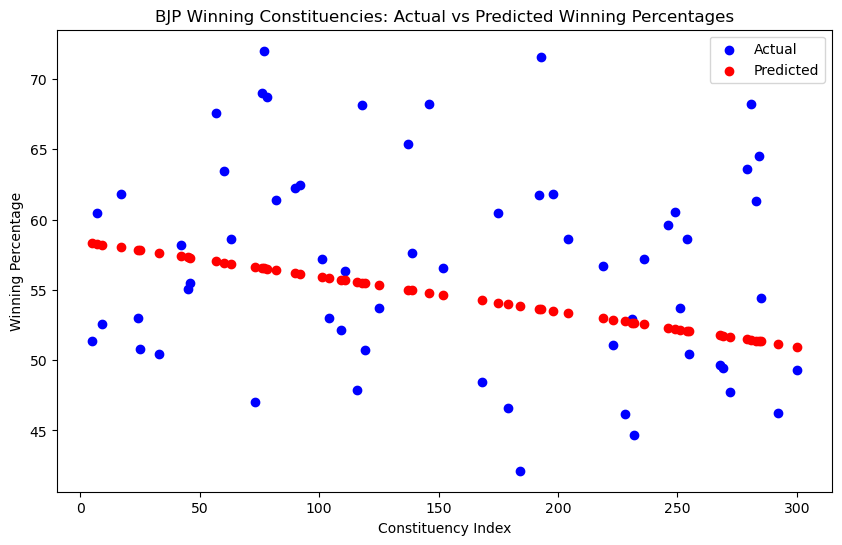

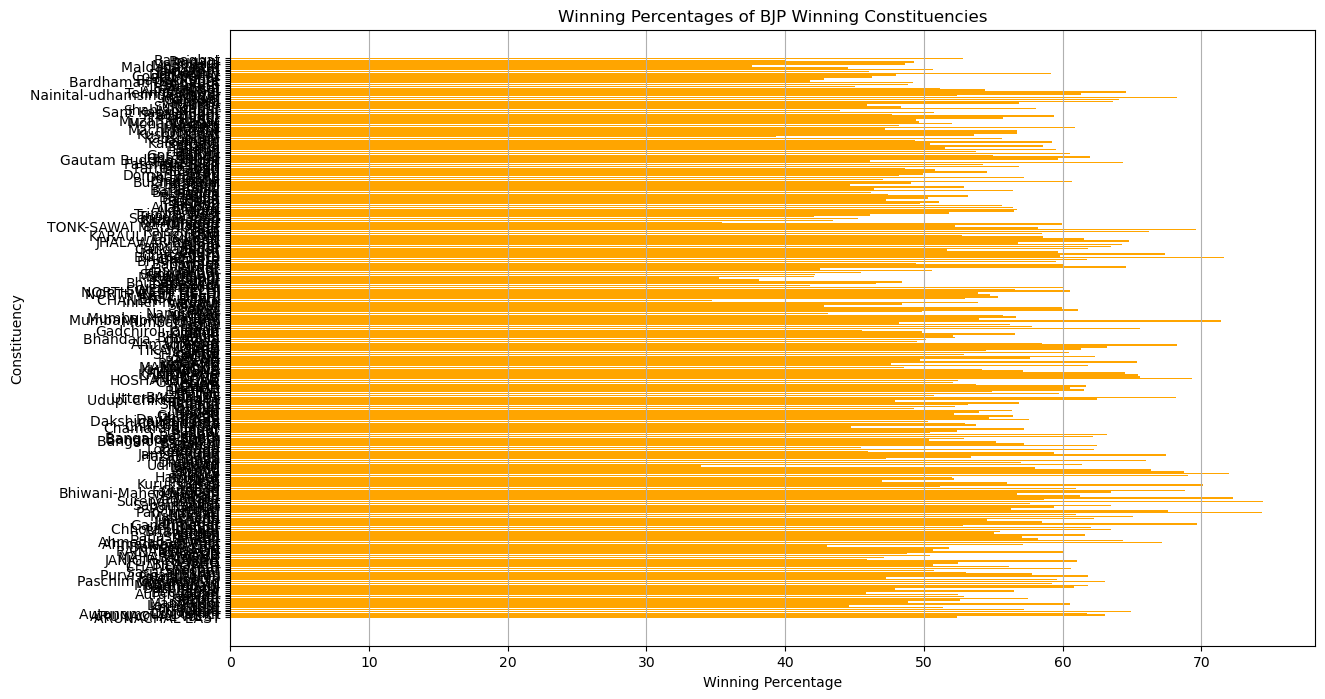

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "C:/Users/viina/Downloads/archive (4)/2019_Results_Winning_Candidate.csv"
data = pd.read_csv(file_path)

# Filter data for BJP winning constituencies
bjp_data = data[data['Party'] == 'Bharatiya Janata Party']

# Define the features and target variable
X = np.arange(len(bjp_data)).reshape(-1, 1)  # Using index as feature for simplicity
y = bjp_data['Percentage'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict the percentages on the test set
y_pred = lasso.predict(X_test)

# Plot the actual vs predicted percentages
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Constituency Index')
plt.ylabel('Winning Percentage')
plt.title('BJP Winning Constituencies: Actual vs Predicted Winning Percentages')
plt.legend()
plt.show()

# Plot the winning percentages for each BJP winning constituency with their names
plt.figure(figsize=(14, 8))
plt.barh(bjp_data['Constituency'], bjp_data['Percentage'], color='orange')
plt.xlabel('Winning Percentage')
plt.ylabel('Constituency')
plt.title('Winning Percentages of BJP Winning Constituencies')
plt.grid(axis='x')
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
import plotly.express as px

# Load the data
file_path = "C:/Users/viina/Downloads/archive (4)/2019_Results_Winning_Candidate.csv"
data = pd.read_csv(file_path)

# Filter data for BJP winning constituencies
bjp_data = data[data['Party'] == 'Bharatiya Janata Party']

# Define the features and target variable
X = np.arange(len(bjp_data)).reshape(-1, 1)  # Using index as feature for simplicity
y = bjp_data['Percentage'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict the percentages on the test set
y_pred = lasso.predict(X_test)

# Create a DataFrame for the test set results
test_results = pd.DataFrame({
    'Constituency': bjp_data.iloc[X_test.flatten()]['Constituency'].values,
    'Actual Percentage': y_test,
    'Predicted Percentage': y_pred
})

# Plot the actual vs predicted percentages using Plotly
fig = px.scatter(test_results, x='Constituency', y='Actual Percentage', 
                 color=px.Constant('Actual'), 
                 labels={'color': 'Type'}, 
                 hover_data={'Constituency': True, 'Actual Percentage': True, 'Predicted Percentage': False})
fig.add_scatter(x=test_results['Constituency'], y=test_results['Predicted Percentage'], 
                mode='markers', name='Predicted', 
                hoverinfo='text', 
                text=test_results['Constituency'])

fig.update_layout(
    title='BJP Winning Constituencies: Actual vs Predicted Winning Percentages',
    xaxis_title='Constituency',
    yaxis_title='Winning Percentage'
)

fig.show()
